In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow import keras

In [2]:
df  = pd.read_csv('four_dataset.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
def Scores(hours):
    model_path = 'four.keras'
    x = df['Hours'].values.reshape(-1,1)
    y = df['Scores'].values.reshape(-1,1)
    xn = x.min()
    yn = y.min()
    xx = x.max()
    yx = y.max()
    x = (x-xn)/(xx-xn)
    y = (y-yn)/(yx-yn)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(1,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = 'adam', loss='mean_squared_error')
        hist = model.fit(x,y, epochs=500)
        model.save('four.keras')
        lv = hist.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(x, y, label='actual', color='blue')
        plt.plot(x,pred, label='predicted', color='pink')
        plt.grid(True)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
    return model.predict(np.array([[(hours-xn)/(xx-xn)]]))[0][0]*(yx-yn)+yn


Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step - loss: 0.4509
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4378
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4249
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4124
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4002
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3883
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3768
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.3656
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3547
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3441
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3338
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3239
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3143
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3050
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2962
Epoch 16/500
1/1 ━━━━━━━━━━━━━

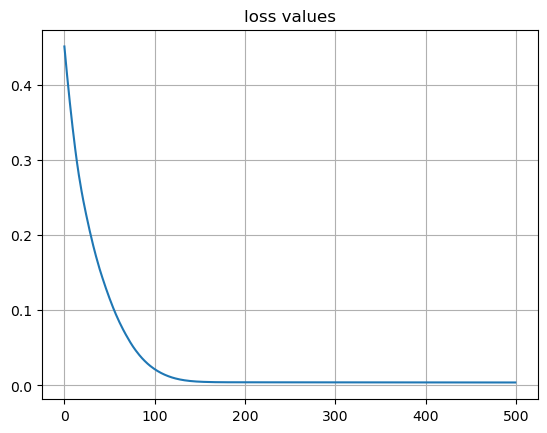

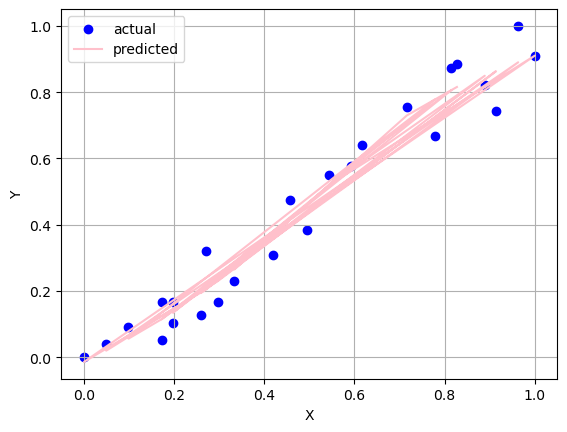

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
51.68090498447418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
81.68565464019775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
22.128661200404167


In [4]:
print(Scores(5))
print(Scores(8))
print(Scores(2))